In [1]:
# Imports math library
import numpy as np
# Imports plotting library
import matplotlib.pyplot as plt

In [2]:
# Define the Rectified Linear Unit (ReLU) function
def ReLU(preactivation):
  activation = preactivation.clip(0.0)
  return activation

In [3]:
# Define a shallow neural network with, one input, one output, and three hidden units
def shallow_1_1_3(x, activation_fn, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31):
  # Initial lines
  pre_1 = theta_10 + theta_11 * x
  pre_2 = theta_20 + theta_21 * x
  pre_3 = theta_30 + theta_31 * x
  # Activation functions
  act_1 = activation_fn(pre_1)
  act_2 = activation_fn(pre_2)
  act_3 = activation_fn(pre_3)
  # Weight activations
  w_act_1 = phi_1 * act_1
  w_act_2 = phi_2 * act_2
  w_act_3 = phi_3 * act_3
  # Combine weighted activation and add y offset
  y = phi_0 + w_act_1 + w_act_2 + w_act_3
  # Return everything we have calculated
  return y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3

In [4]:
# # Plot the shallow neural network.  We'll assume input in is range [-1,1] and output [-1,1]
def plot_neural(x, y):
  fig, ax = plt.subplots()
  ax.plot(x.T,y.T)
  ax.set_xlabel('Input'); ax.set_ylabel('Output')
  ax.set_xlim([-1,1]);ax.set_ylim([-1,1])
  ax.set_aspect(1.0)
  plt.show()

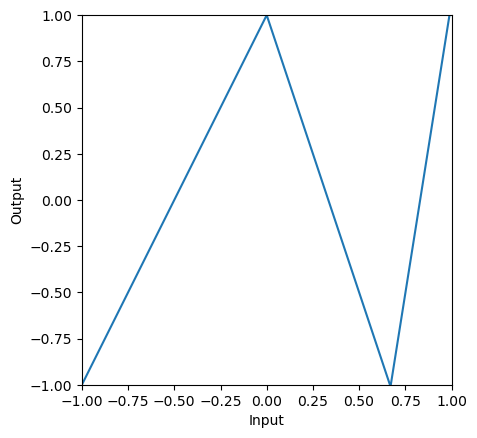

In [5]:
# Now lets define some parameters and run the first neural network
n1_theta_10 = 0.0   ; n1_theta_11 = -1.0
n1_theta_20 = 0     ; n1_theta_21 = 1.0
n1_theta_30 = -0.67 ; n1_theta_31 =  1.0
n1_phi_0 = 1.0; n1_phi_1 = -2.0; n1_phi_2 = -3.0; n1_phi_3 = 9.3

# Define a range of input values
n1_in = np.arange(-1,1,0.01).reshape([1,-1])

# We run the neural network for each of these input values
n1_out, *_ = shallow_1_1_3(n1_in, ReLU, n1_phi_0, n1_phi_1, n1_phi_2, n1_phi_3, n1_theta_10, n1_theta_11, n1_theta_20, n1_theta_21, n1_theta_30, n1_theta_31)
# And then plot it
plot_neural(n1_in, n1_out)

$$\begin{aligned} \mathbf{h}_1 &= a[\mathbf{\beta}_0 + \mathbf{\Omega}_0\mathbf{x}] \\ \mathbf{h}_2 &= a[\mathbf{\beta}_1 + \mathbf{\Omega}_1\mathbf{h}_1] \\ \mathbf{h}_3 &= a[\mathbf{\beta}_2 + \mathbf{\Omega}_2\mathbf{h}_2] \\ &\vdots \\ \mathbf{h}_K &= a[\mathbf{\beta}_{K-1} + \mathbf{\Omega}_{K-1}\mathbf{h}_{K-1}] \\ y &= \mathbf{\beta}_K + \mathbf{\Omega}_K\mathbf{h}_K \end{aligned}$$

In [17]:
n1_in[0][:5]

array([-1.  , -0.99, -0.98, -0.97, -0.96])

In [19]:
n1_in.size

200

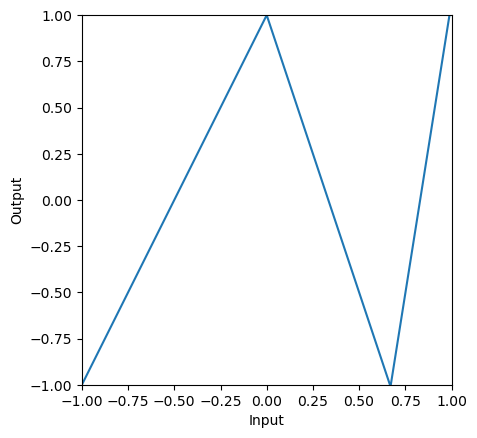

In [21]:
beta_0 = np.zeros((3,1))
Omega_0 = np.zeros((3,1))
beta_1 = np.zeros((1,1))
Omega_1 = np.zeros((1,3))

# To get you started I've filled in a couple:
beta_0[0,0] = n1_theta_10
beta_0[1,0] = n1_theta_20
beta_0[2,0] = n1_theta_30

Omega_0[0,0] = n1_theta_11
Omega_0[1,0] = n1_theta_21
Omega_0[2,0] = n1_theta_31

beta_1[0, 0] = n1_phi_0

Omega_1[0, 0] = n1_phi_1 
Omega_1[0, 1] = n1_phi_2
Omega_1[0, 2] = n1_phi_3

# Make sure that input data matrix has different inputs in its columns
n_data = n1_in.size
n_dim_in = 1
n1_in_mat = np.reshape(n1_in,(n_dim_in,n_data))

# This runs the network for ALL of the inputs, x at once so we can draw graph
h1 = ReLU(beta_0 + np.matmul(Omega_0,n1_in_mat))
n1_out = beta_1 + np.matmul(Omega_1,h1)

# Draw the network and check that it looks the same as the non-matrix case
plot_neural(n1_in, n1_out)

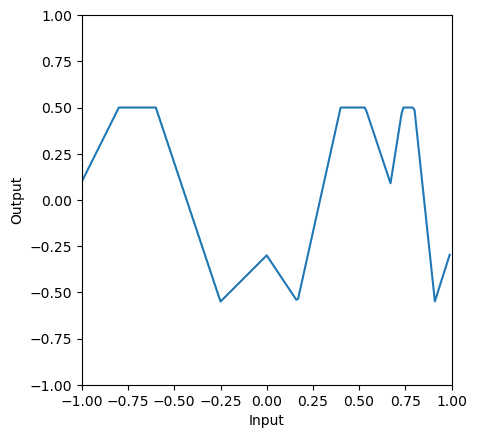

In [22]:
# Now lets define some parameters and run the second neural network
n2_theta_10 =  -0.6 ; n2_theta_11 = -1.0
n2_theta_20 =  0.2  ; n2_theta_21 = 1.0
n2_theta_30 =  -0.5  ; n2_theta_31 =  1.0
n2_phi_0 = 0.5; n2_phi_1 = -1.0; n2_phi_2 = -1.5; n2_phi_3 = 2.0

# Define a range of input values
n2_in = np.arange(-1,1,0.01)

# We run the second neural network on the output of the first network
n2_out, *_ = \
    shallow_1_1_3(n1_out, ReLU, n2_phi_0, n2_phi_1, n2_phi_2, n2_phi_3, n2_theta_10, n2_theta_11, n2_theta_20, n2_theta_21, n2_theta_30, n2_theta_31)
# And then plot it
plot_neural(n1_in, n2_out)

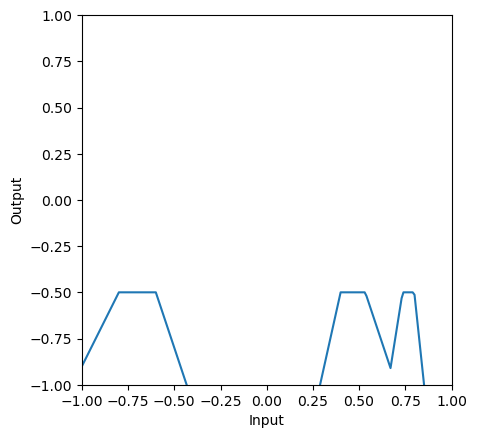

In [24]:
beta_0 = np.zeros((3,1))
Omega_0 = np.zeros((3,1))
beta_1 = np.zeros((3,1))
Omega_1 = np.zeros((3,3))
beta_2 = np.zeros((1,1))
Omega_2 = np.zeros((1,3))

beta_0[0,0] = n1_theta_10
beta_0[1,0] = n1_theta_20
beta_0[2,0] = n1_theta_30

Omega_0[0,0] = n1_theta_11
Omega_0[1,0] = n1_theta_21
Omega_0[2,0] = n1_theta_31

beta_1[0,0] = n2_theta_10 + n2_theta_11 * n1_phi_0
beta_1[1, 0] = n2_theta_20 + n2_theta_21 * n1_phi_0
beta_1[2, 0] = n2_theta_30 + n2_theta_31 * n1_phi_0

Omega_1[0,0] = n2_theta_11 * n1_phi_1
Omega_1[0, 1] = n2_theta_11 * n1_phi_2
Omega_1[0, 2] = n2_theta_11 * n1_phi_3


Omega_1[1,0] = n2_theta_21 * n1_phi_1
Omega_1[1, 1] = n2_theta_21 * n1_phi_2
Omega_1[1, 2] = n2_theta_21 * n1_phi_3

Omega_1[2,0] = n2_theta_31 * n1_phi_1
Omega_1[2, 1] = n2_theta_31 * n1_phi_2
Omega_1[2, 2] = n2_theta_31 * n1_phi_3

beta_2[0, 0] = n2_theta_30

Omega_2[0, 0] = n2_phi_1
Omega_2[0, 1] = n2_phi_2
Omega_2[0, 2] = n2_phi_3

# Make sure that input data matrix has different inputs in its columns
n_data = n1_in.size
n_dim_in = 1
n1_in_mat = np.reshape(n1_in,(n_dim_in,n_data))

# This runs the network for ALL of the inputs, x at once so we can draw graph (hence extra np.ones term)
h1 = ReLU(beta_0 + np.matmul(Omega_0,n1_in_mat))
h2 = ReLU(beta_1 + np.matmul(Omega_1,h1))
n1_out = beta_2 + np.matmul(Omega_2,h2)

# Draw the network and check that it looks the same as the non-matrix version
plot_neural(n1_in, n1_out)

In [26]:
# define sizes
D_i=4; D_1=5; D_2=2; D_3=4; D_o=1
# We'll choose the inputs and parameters of this network randomly using np.random.normal
# For example, we'll set the input using
n_data = 4;
x = np.random.normal(size=(D_i, n_data))
# Replace the lines below
beta_0 = np.random.normal(size=(5,1)) # bias in the first layer (5 neurons)
beta_1 = np.random.normal(size=(2,1)) # bias in the second layer (2 neurons)
beta_2 = np.random.normal(size=(4,1)) # bias in the third layer (4 neurons)
beta_3 = np.random.normal(size=(1,1)) # bias for output (1 neuron)

Omega_0 = np.random.normal(size=(5,4)) 
Omega_1 = np.random.normal(size=(2,5))
Omega_2 = np.random.normal(size=(4,2))
Omega_3 = np.random.normal(size=(1,4))


# If you set the parameters to the correct sizes, the following code will run
h1 = ReLU(beta_0 + np.matmul(Omega_0,x));
h2 = ReLU(beta_1 + np.matmul(Omega_1,h1));
h3 = ReLU(beta_2 + np.matmul(Omega_2,h2));
y = beta_3 + np.matmul(Omega_3,h3)

if h1.shape[0] is not D_1 or h1.shape[1] is not n_data:
  print("h1 is wrong shape")
if h2.shape[0] is not D_2 or h1.shape[1] is not n_data:
  print("h2 is wrong shape")
if h3.shape[0] is not D_3 or h1.shape[1] is not n_data:
  print("h3 is wrong shape")
if y.shape[0] is not D_o or h1.shape[1] is not n_data:
  print("Output is wrong shape")

# Print the inputs and outputs
print("Input data points")
print(x)
print ("Output data points")
print(y)

Input data points
[[ 2.44649697  1.35104642  1.28349898 -0.53412605]
 [-0.90045703 -1.53014995 -0.80796412 -0.81165681]
 [ 0.08834858  1.8132695   1.33899109  0.73073687]
 [-0.40443779  0.72372701 -0.39420027 -1.26914529]]
Output data points
[[-1.48209007 -7.10511104 -4.58331169 -3.57818649]]
